# Graph Isomorphism Problem
### Rodrigo Almeida - G00377123
***

### <b>Understanding Graphs:

<p>First let's understand Graph with a simple drawing and example.</p>

<p>Consider a graph that represents a social network of friends. The vertices in this graoh represent people, and the edges represent their friendships.</p>
Here is a visual representation of this graph:

    A -- B
    |    |
    C -- D

<p>In this graph, there are four vertices labeled A, B, C and D. The edges between the vertices represent the friendships between the people they represent. For example, there is an edge between A and B, indicating that A and B are friends. There is also an edge between B and D, indicating that B and D are friends.</p>

<p>This graph can be represented mathematically as follows:</p>
<p> V = {A, B, C, D}  <mark>//set of vertices</p>
<p> E = {(A,B),(A,C),(B,D),(C,D)} <mark>//set of edges</p>


<p>Here, V is the set of vertices, and E is the set of edges. The elements of E are pairs of vertices, indicating which vertices are connected by an edge.</p>

<p>Graphs can be used to represent a wide range of relationships between objects, such as connections in transport network, dependencies in a software system, or links on a website. By representing these relationships as a graph, we can use mathematical tools to analyze and understand them, and to solve problems related to them.</p>

### <b>Understanding the Graph Isomorphism Problem
***

<p>The graph isomorphism problem is a well-know problem in computer science and mathematics that asks whether two given graphs are isomorphic meaning that they have the same structure but possibly different vertex labels. This problem has important application in fields such as chemistry, physics, and computer vision, and has been subject of much research in computer science and mathematics.</p>

<p>One breakthrough in the field was the development of a quasipolynomial-time algorithm for the graph isomorphism problem by László Babai in 2015. This algorithm was a major improvement over previous algorithms, and showed that the problem can be solved much faster than was previously thought. However, the problem is still considered difficult, and researchers continue to work developing even faster algorithms.</p>

### <b>Explaning Time Complexity
***

<p><b>Q. Imagine a classroom of 100 students in which you gave your pen to one person. You have to find that pen without knowing to whom you gave it.</b></p>

Here are some ways to find the pen and what the O order is.

<p>O(n2): You go and ask the first person in the class if he has the pen. Also, you ask this person about the other 99 people in the classroom if they have that pen and so on, This is what we call O(n2). </p>
<p>O(n): Going and asking each student individually is O(N). </p>
<p>O(log n): Now I divide the class into two groups, then ask: “Is it on the left side, or the right side of the classroom?” Then I take that group and divide it into two and ask again, and so on. Repeat the process till you are left with one student who has your pen. This is what you mean by O(log n). </p>

<p>In computer science, time complexity refers to the amount of time required by an algorithm to solve a particular problem as a function of the size of the input. It is a measure of the efficiency of an algorithm. Time complexity is usually expressed in terms of big-O notation, which provides an upper bound on the running time of the algorithm.</p>

<p>The goal of time complexity analysis is to identify the best algorithm for solving a given problem in terms of the amount of time it takes to complete. In general, the best algorithm is one with the lowest possible time complexity. However, in practice, there may be ohter factors to consider, such as the ease of inplementation, memory usage, or the complexity of the algorithm.</p>

<p>Time complexity is an important concept in computer science because it help us compare the efficiency of different algorithms for solving the same problem. By analysing the time complexity of an algorithm, we can determine wheater it is feasible to solve a particular problem on a given computer within a reasonable amount of time.</p>

<p>The terms that are important and will help us understand the time complexity of the graph isomorphism problem are:</p>

<p><b>- Quasipolynomial time:</b> A problem is said to be solvable in quasipolynomial time if there is an algorithm that can solve the problem in time O(n^{polylog n}), where polylog n means logarithm of n taken a polynomial number of times. This is faster than exponential time but slower than polynomial time. In other words, the running time of a quasipolynomial time algorithm grows only slightly faster than a polynomial, making it much faster than exponential time.</p>
<t>An example of a problem that can be solved in quasipolynomial time is the graph isomorphism problem, which was shown by László Babai in 2015 to be solvable in quasipolynomial time. The recent breakthrough by Babai in 2015 provides a polynomial-time algorithm for the graph isomorphism problem, which is even faster than quasipolynomial time.


<p><b>- Polynomial time:</b> A problem is said to be solvable in polynomial time if there is an algorithm that can solve the problem in time O(n^k) for some fixed constant k, where n is the size of the input. Polynomial time algorithms are considered efficient because their running time grows at most polynomially with the size of the input.</p>
<p>Examples of problems that can be solved in polynomial time include sorting and searching, as well as many other problems in computer science and mathematics. </p>

<p><b>- NP-complete:</b> A problem is said to be NP-complete if it is both in the complexity class NP and it is at least as hard as the hardest problems in NP. In other words, an NP-complete problem is one that is believed to be computationally intractable, meaning that there is no known algorithm that can solve the problem in polynomial time. However, if a polynomial time algorithm is found for an NP-complete problem, it would imply that all problems in NP can be solved in polynomial time.</p>
<p>Examples of NP-complete problems include the traveling salesman problem, the knapsack problem, and the satisfiability problem.</p>

***
<!-- sets
maps
permutation -->

# Brute-force code for Isomorphisms
***


The following python code has the function “brute_force_test_graph_isomorphism”, which accepts as an arguments 2 adjacency matrix and returns True or False whether graphs are isomorphic or not. The detail of the code is explained below.

First lets import itertools and numpy

In [113]:
import itertools as it
import numpy as np

The following code checks first if the graph order of both graphs is equal (using get_graph_order function), if that’s not the case, graphs are not isomorphic. 

In [114]:
def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)

The next step is check the degree sequence is also equal (the degree-sequence of a graph is the sequence formed by arranging the vertex in non-incresasing order).

degree_sequence_G1 = degree_sequence_G2 = (2, 2, 2, 2, 2)

In [115]:
def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence

Finally, if these two checks are passed, then comes the hardest part. The code will use the function get_all_vertex_permutations to generate all the possible vertex permutations for the AG2 and compare if there is one of them that is equal to AG1.

In [116]:
def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix

The following python code has the function “brute_force_test_graph_isomorphism”, which accepts as an arguments 2 adjacency matrix and returns True or False whether graphs are isomorphic or not. 

In [117]:

def brute_force_test_graph_isomporphism(adj_1, adj_2):
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    if get_graph_order(adj_1) != get_graph_order(adj_1):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

Let’s use the following example to go through the code above. We’ll check if the 2 following graphs are isomorphic.

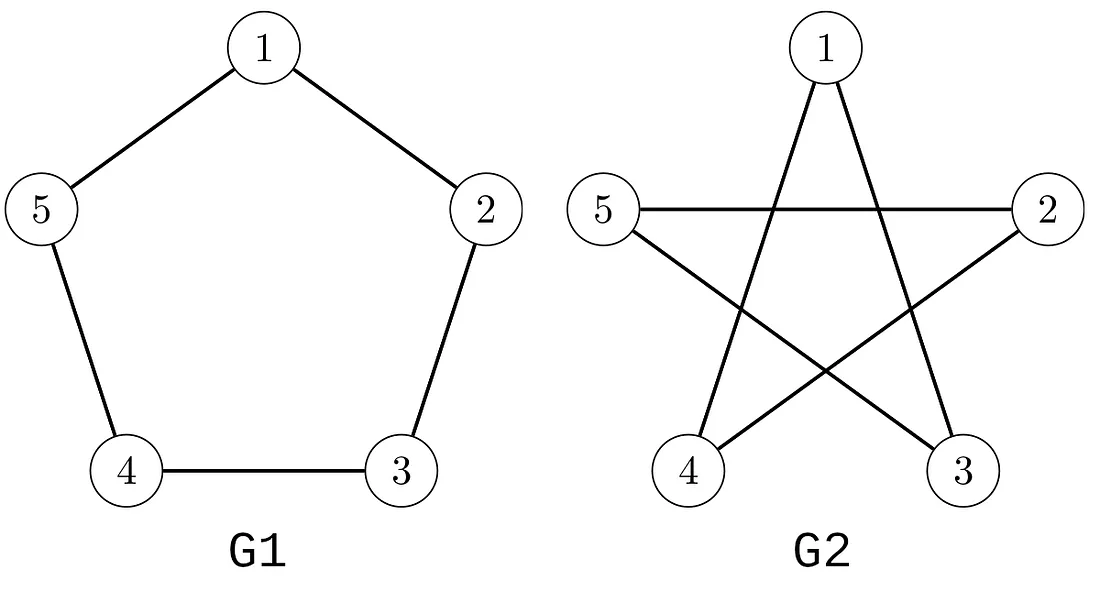

With the following adjacency matrix:

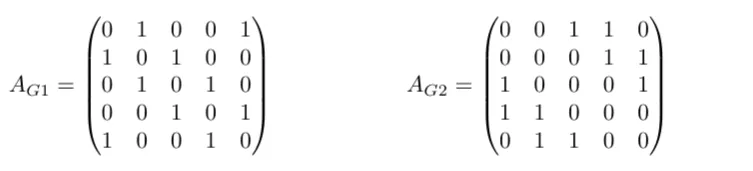

The code checks first if the graph order of both graphs is equal (using get_graph_order function), if that’s not the case, graphs are not isomorphic. In the example, G1 and G2 have vertex order 5.

In [118]:
Ag1 = np.array([[0,1,0,0,1],[1,0,1,0,0], [0,1,0,1,0], [0,0,1,0,1], [1,0,0,1,0]])
Ag2 = np.array([[0,0,1,1,0],[0,0,0,1,1], [1,0,0,0,1], [1,1,0,0,0], [0,1,1,0,0]])

get_graph_order(Ag1)


5

In [119]:
get_graph_order(Ag2)

5

The next step is check the degree sequence is also equal (the degree-sequence of a graph is the sequence formed by arranging the vertex in non-incresasing order).

In [120]:
get_degree_sequence(Ag1)


[2, 2, 2, 2, 2]

In [121]:
get_degree_sequence(Ag2)

[2, 2, 2, 2, 2]

Finally, if these two checks are passed, then comes the hardest part. The code will use the function get_all_vertex_permutations to generate all the possible vertex permutations for the AG2 and compare if there is one of them that is equal to AG1. In our example, since there are 5 vertex, there are 5! (120) possible permutations to check. For the example, G1 and G2 are isomorphic, so brute_force_test_graph_isomporphism will return True.



In [122]:
get_all_vertex_permutations(Ag1)

[{'perm_vertex': [0, 1, 2, 3, 4],
  'adj_matrix': array([[0, 1, 0, 0, 1],
         [1, 0, 1, 0, 0],
         [0, 1, 0, 1, 0],
         [0, 0, 1, 0, 1],
         [1, 0, 0, 1, 0]])},
 {'perm_vertex': [0, 1, 2, 4, 3],
  'adj_matrix': array([[0, 1, 0, 1, 0],
         [1, 0, 1, 0, 0],
         [0, 1, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 0, 1, 1, 0]])},
 {'perm_vertex': [0, 1, 3, 2, 4],
  'adj_matrix': array([[0, 1, 0, 0, 1],
         [1, 0, 0, 1, 0],
         [0, 0, 0, 1, 1],
         [0, 1, 1, 0, 0],
         [1, 0, 1, 0, 0]])},
 {'perm_vertex': [0, 1, 3, 4, 2],
  'adj_matrix': array([[0, 1, 0, 1, 0],
         [1, 0, 0, 0, 1],
         [0, 0, 0, 1, 1],
         [1, 0, 1, 0, 0],
         [0, 1, 1, 0, 0]])},
 {'perm_vertex': [0, 1, 4, 2, 3],
  'adj_matrix': array([[0, 1, 1, 0, 0],
         [1, 0, 0, 1, 0],
         [1, 0, 0, 0, 1],
         [0, 1, 0, 0, 1],
         [0, 0, 1, 1, 0]])},
 {'perm_vertex': [0, 1, 4, 3, 2],
  'adj_matrix': array([[0, 1, 1, 0, 0],
         [1, 0, 0, 0,

In [123]:
get_all_vertex_permutations(Ag2)

[{'perm_vertex': [0, 1, 2, 3, 4],
  'adj_matrix': array([[0, 0, 1, 1, 0],
         [0, 0, 0, 1, 1],
         [1, 0, 0, 0, 1],
         [1, 1, 0, 0, 0],
         [0, 1, 1, 0, 0]])},
 {'perm_vertex': [0, 1, 2, 4, 3],
  'adj_matrix': array([[0, 0, 1, 0, 1],
         [0, 0, 0, 1, 1],
         [1, 0, 0, 1, 0],
         [0, 1, 1, 0, 0],
         [1, 1, 0, 0, 0]])},
 {'perm_vertex': [0, 1, 3, 2, 4],
  'adj_matrix': array([[0, 0, 1, 1, 0],
         [0, 0, 1, 0, 1],
         [1, 1, 0, 0, 0],
         [1, 0, 0, 0, 1],
         [0, 1, 0, 1, 0]])},
 {'perm_vertex': [0, 1, 3, 4, 2],
  'adj_matrix': array([[0, 0, 1, 0, 1],
         [0, 0, 1, 1, 0],
         [1, 1, 0, 0, 0],
         [0, 1, 0, 0, 1],
         [1, 0, 0, 1, 0]])},
 {'perm_vertex': [0, 1, 4, 2, 3],
  'adj_matrix': array([[0, 0, 0, 1, 1],
         [0, 0, 1, 0, 1],
         [0, 1, 0, 1, 0],
         [1, 0, 1, 0, 0],
         [1, 1, 0, 0, 0]])},
 {'perm_vertex': [0, 1, 4, 3, 2],
  'adj_matrix': array([[0, 0, 0, 1, 1],
         [0, 0, 1, 1,

In [124]:
brute_force_test_graph_isomporphism(Ag1, Ag2)

True

The permutation of AG2 that transforms it to AG1 is the following:

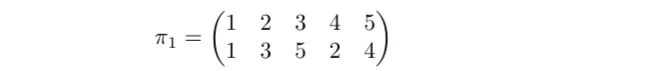

<b><mark>It means that if we relabel in G2 vertex 1 as 1, 2 as 3, 3 as 3, 4 as 2, 5 as 4, we end up as the same G1 graph.
***


# 14 March 2023 - Lecture Examples 
***

In [125]:
Example1 = np.array([[1,0],[0,1]])
Example2 = np.array([[1,0,0],[0,1,0], [0,0,1]])


In [126]:
get_graph_order(Example1)

2

In [127]:
get_degree_sequence(Example1)

[1, 1]

In [128]:
get_all_vertex_permutations(Example1)

[{'perm_vertex': [0, 1],
  'adj_matrix': array([[1, 0],
         [0, 1]])},
 {'perm_vertex': [1, 0],
  'adj_matrix': array([[1, 0],
         [0, 1]])}]

***

# Lecture 21 March 2023 Example
***

In [129]:
Example3 = np.array([[0,1,1],[1,0,0], [1,0,0]])
Example4 = np.array([[0,1,0],[1,0,1], [0,1,0]])


In [130]:
get_all_vertex_permutations(Example3)

[{'perm_vertex': [0, 1, 2],
  'adj_matrix': array([[0, 1, 1],
         [1, 0, 0],
         [1, 0, 0]])},
 {'perm_vertex': [0, 2, 1],
  'adj_matrix': array([[0, 1, 1],
         [1, 0, 0],
         [1, 0, 0]])},
 {'perm_vertex': [1, 0, 2],
  'adj_matrix': array([[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]])},
 {'perm_vertex': [1, 2, 0],
  'adj_matrix': array([[0, 0, 1],
         [0, 0, 1],
         [1, 1, 0]])},
 {'perm_vertex': [2, 0, 1],
  'adj_matrix': array([[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]])},
 {'perm_vertex': [2, 1, 0],
  'adj_matrix': array([[0, 0, 1],
         [0, 0, 1],
         [1, 1, 0]])}]

In [131]:
get_all_vertex_permutations(Example4)

[{'perm_vertex': [0, 1, 2],
  'adj_matrix': array([[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]])},
 {'perm_vertex': [0, 2, 1],
  'adj_matrix': array([[0, 0, 1],
         [0, 0, 1],
         [1, 1, 0]])},
 {'perm_vertex': [1, 0, 2],
  'adj_matrix': array([[0, 1, 1],
         [1, 0, 0],
         [1, 0, 0]])},
 {'perm_vertex': [1, 2, 0],
  'adj_matrix': array([[0, 1, 1],
         [1, 0, 0],
         [1, 0, 0]])},
 {'perm_vertex': [2, 0, 1],
  'adj_matrix': array([[0, 0, 1],
         [0, 0, 1],
         [1, 1, 0]])},
 {'perm_vertex': [2, 1, 0],
  'adj_matrix': array([[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]])}]

In [132]:
brute_force_test_graph_isomporphism(Example3, Example4)

True

***
References:
1. https://calcworkshop.com/trees-graphs/isomorphic-graph/
2. https://en.wikipedia.org/wiki/Graph_isomorphism_problem#:~:text=The%20graph%20isomorphism%20problem%20is,computational%20complexity%20class%20NP%2Dintermediate.
3. Barabási, Albert-László. "Network science." Cambridge University Press, 2016.
4. Time Complexity - https://www.geeksforgeeks.org/understanding-time-complexity-simple-examples/
5. https://en.wikipedia.org/wiki/Time_complexity#:~:text=Quasi%2Dpolynomial%20time%20algorithms%20are,algorithm%20is%20for%20some%20fixed%20.
6. Time Complexity: What is Time Complexity & its Algorithms? (mygreatlearning.com)
7. Brute Force Algorithm https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570